# Iris dataset
The dataset is about three types of Iris flowers. The data has been collected of Iris viginica, Iris versicolor and Iris setosa.
## Dataset metadata
There is 150 samples has been recorded for the plants. Each plant has 50 samples. The samples described as:
* sepal length
* sepal width
* petal length
* petal width

The Iris versicolor and Iris viginica are very similar and hardly separatable from each other. On the otherhand Iris setosa can be easily separated from the other two. 

## Acquire the dataset
The data is available in csv format at UCI's or an easier way is to use sklearn datasets:

[UCI Repository](https://archive.ics.uci.edu/ml/datasets/Iris)

[Iris Dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

[Sklearn datasets](https://scikit-learn.org/stable/datasets/index.html)

In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
#Import the library
from sklearn.datasets import load_iris
#Load the dataset
iris = load_iris()

In [2]:
#Print the description
#print(iris.DESCR)

## Convert the dataset to pandas dataframe
_Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language._[Source](https://pandas.pydata.org/)

The dataframe is technically a mutable matrix.

In [3]:
#Import pandas
import pandas as pd
import numpy as np
#Create array for the names
nt=['']*len(iris.target)
#Loop index
i=0
#Loop the targets
for t in iris.target:
    #Map the name into the new array
    nt[i]=iris.target_names[t]   
    #Increase the index
    i+=1 

#Create a dataframe from the loaded iris dataset
#The names of the species are in a separate array si it has to be concatenated to the data array
df = pd.DataFrame(np.c_[iris.data,nt], columns=iris.feature_names+['Species'])

In [4]:
#Print out the merged data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# Visualisation of Iris Dataset
The (seaborn)[https://seaborn.pydata.org/] statistical data visualisation tool a grid of scatter diagrams can be created from the abowe pandas dataframe. Since I acquired the dataset from sklearn the number rows have to be converted to float.

These diagrams shows the relations between both sepal and petal length and with of the species. By clustering the records by the species of the flowers the they can be separeted visually. Clustering is done with colours and markers.

It is clearly visible how close Iris versicolor and Iris virginica length and widths are.

In [5]:
#Import seaborn for to plot the dataframe
import seaborn as sns
#Import pyplot. It is the underlying mechanishm of seaborn
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
#Suppress the future warning for seaborn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Convert the columns from object type to float
df = df.astype({"sepal length (cm)":float,"sepal width (cm)":float,"petal length (cm)":float,"petal width (cm)":float})
#Create a pairplot from the dataframe
p=sns.pairplot(df, hue='Species', markers=["o", "s", "D"],height=4)
#Add header text to the diagram
p.fig.suptitle('Visualisation of Iris species',fontsize=25,color='g')
#Make the plots use only 90% of the space so the header text is not on them
plt.subplots_adjust(top=0.9)

### Statistical diagrams
[Pandas](https://pandas.pydata.org/) helps with the statistics of the data. 
* mean of records
* standard deviation of recodrs
* longest(max) and shortest(min) length and with

In [6]:
st=df.describe().loc[['mean','std','min','max']]
st

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    //https://stackoverflow.com/questions/36757301/disable-ipython-notebook-autoscrolling
    //Turn of autoscrolling on output for the next block
    return false;
}

<IPython.core.display.Javascript object>

#### Visualise the description table as bar diagrams

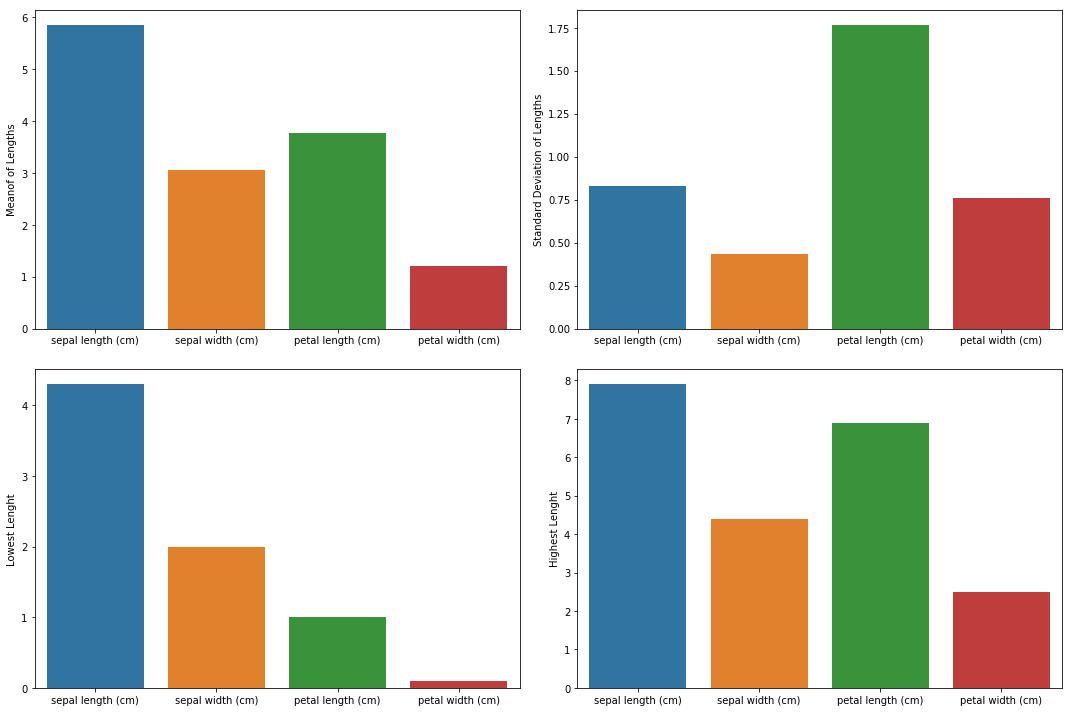

In [8]:
#Create a new figure for the grid
plt.figure(figsize=(15,10))
#First row first col
plt.subplot(2,2,1)
#Get the mean from describe
mean=df.describe().loc[['mean']]
#Create a barplot
ax=sns.barplot(x=iris.feature_names,y=mean.iloc[0])
#Rename the y axis
ax.set(ylabel='Meanof of Lengths')

#First row second col
plt.subplot(2,2,2)
#Get the std from describe
std=df.describe().loc[['std']]
#Create a barplot
ax2=sns.barplot(x=iris.feature_names,y=std.iloc[0])
#Rename the y axis
ax2.set(ylabel='Standard Deviation of Lengths')

#Second row first col
plt.subplot(2,2,3)
#Get the min from describe
min=df.describe().loc[['min']]
ax3=sns.barplot(x=iris.feature_names,y=min.iloc[0])
#Rename the y axis
ax3.set(ylabel='Lowest Lenght')

#Second row second col
plt.subplot(2,2,4)
#Get the max from describe
max=df.describe().loc[['max']]
ax4=sns.barplot(x=iris.feature_names,y=max.iloc[0])
#Rename the y axis
ax4.set(ylabel='Highest Lenght')
#Make the padding smaller
plt.tight_layout(h_pad=2)

# Difficulty of separating the species by data
The Iris data set is good for visualisation projects and learning the first steps of machine learning as this dataset is popular and most machine learning libraries deliver the dataset like [sklearn](https://scikit-learn.org/stable/). The data can be visualised simply with [pyplot](https://matplotlib.org/api/pyplot_api.html), [seaborn](https://seaborn.pydata.org/examples/index.html), [bokeh](https://bokeh.pydata.org/en/latest/) or any other plotting/visualisation library.

It is not that easy to write effiecient and accurate machine learning algorithm for this dataset. The some of the values of the dataset overlaps. This means to create an algorithm the values has to be klustered (grouped)

The blow diagrams visualizes the overlap between species:
1. By petal length Iris setosa can be easily recognised
2. By petal with Iris setosa can be easily recognised
3. By sepal length Iris setosa still can be recognised easily in if the length is over 4 cm and 5 cm
4. It is hard to find out the species of Iris by sepal width as all three has similar values
This confirms the values are hard to separate for Iris versicolor and Iris virginica and some cases even Iris setosa can be hard to separate.


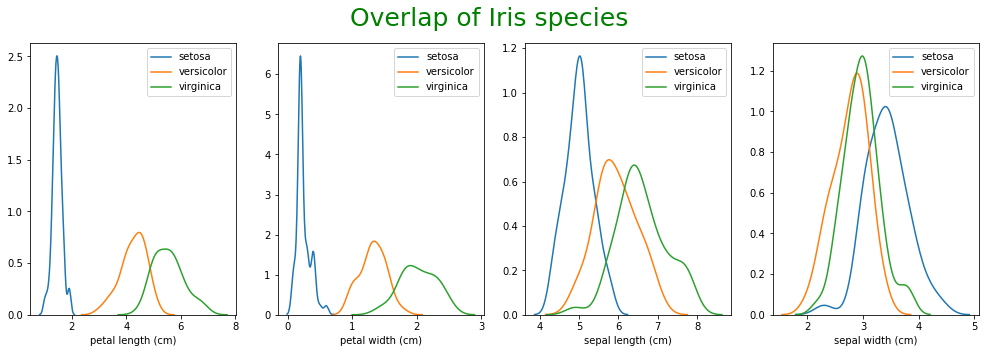

In [9]:
#Cretae subplot axes
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4)
#Set figure size
fig.set_size_inches(17,5)
fig.suptitle('Overlap of Iris species',fontsize=25,color='g')
#Crete kdeplot and ad plots
g=sns.FacetGrid(df, hue='Species') \
   .map(sns.kdeplot, "petal length (cm)", ax=ax1) \
   .map(sns.kdeplot, "petal width (cm)", ax=ax2) \
   .map(sns.kdeplot, "sepal length (cm)", ax=ax3) \
   .map(sns.kdeplot, "sepal width (cm)", ax=ax4)
#Add labels for each axis
ax1.set_xlabel('petal length (cm)')
ax2.set_xlabel('petal width (cm)')
ax3.set_xlabel('sepal length (cm)')
ax4.set_xlabel('sepal width (cm)')
#Dirty hack to remove facetgrids original fig
g.fig.set_size_inches(0.1,0.1)
plt.xlabel("")
#https://stackoverflow.com/questions/24497172/remove-yaxis-values-from-facetgrid-in-seaborn/24497489#24497489
g.set(yticks=[]) 
g.set(xticks=[])




# Machine learning algorithms with clustering
Clustering is way of grouping similar value into three different group where the in each individual group the velues as more similar to each other. The each group is called a cluster.

Clustering is a good fit for Iris data set as three clusters can be created. One cluster for each species.
1. Iris setosa
2. Iris versicolor
3. Iris virginica

## Sklearn.cluster
[Sklearn.cluster](https://scikit-learn.org/stable/modules/clustering.html) is a collection of unsupervised machine learning algorithms. 

### [K-means](https://www.saedsayad.com/clustering_kmeans.htm)
K-means is an algroithm that creates K number of clusters and allocates the values given to the algorithm to the clusters clusters.

K is the number of clusters to be separated. The algorithm starts with cretaing K amount of centroids at random locations in the dataset then checks the distance of every value in the dataset to each centroid. The value is placed into the cluster with the nearest mean. Once the all values are allocated to a cluster new centroids are created by the mean of the data in each cluster and each value is reassigned again to the closes cluster.

This proscess is repeated until the same values are placed into the same clusters in consecutive iterations.

Choosing a high number of clusters may not be ideal as it would not add much more accuracy. This highly depends of the data.

#### Set up K-means

In [10]:
# Import KMeans model
from sklearn.cluster import KMeans
# Import metrics to check accuracy of the method
from sklearn import metrics
# Make the model. 3 clusters for each species. Seed the random state generator with 600 to make it deterministic
kmeans = KMeans(n_clusters=3,random_state=600)
# Fitting Model 
kmeans.fit(iris.data,iris.target)
# Perdict with the same data
predicted=kmeans.predict(iris.data)
# Print out prediction accuracy
print("Prediction accuracy: %f" % metrics.accuracy_score(iris.target,  predicted))

Prediction accuracy: 0.893333


Text(0.5, 0.98, 'Cluster center points')

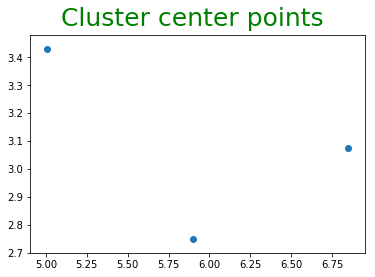

In [11]:
#Get the cluster centre points
centers = kmeans.cluster_centers_
#Create a figure for the digram
fig = plt.figure()
#Create a scatter pot abd add to the figure
ax = fig.add_subplot(111).scatter(centers[:, 0], centers[:, 1])
#Add label to the figure
fig.suptitle("Cluster center points",fontsize=25,color='g')

#### Predict with K-means



In [12]:
#Predict first
f=kmeans.predict([iris.data[0]])==iris.target[0]
#Predict middle
m=kmeans.predict([iris.data[75]])==iris.target[75]
#Predict last
l=kmeans.predict([iris.data[149]])==iris.target[149]
print("Predicted first: %r: " % f[0])
print("Predicted middle: %r: " % m[0])
print("Predicted last: %r: " % l[0])


Predicted first: True: 
Predicted middle: True: 
Predicted last: False: 


The first and middle values were predicted correctly. The last value is in the 10.6 percent where the prediction is in correct.


### [Birch](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html)
The algorithm creates a tree of the data. Then it optionally scans the initial tree's leaf nodes to build another smaller tree. At the same time it removes the leafs that are too far out. 

It uses an existing clustering algorithm (like K-means) to cluster the leaf nodes. This allows us to specify the desired number of clusters (default is 3).

#### Set up Birch

In [13]:
#Import Birch
from sklearn.cluster import Birch
#Make the model
birch = Birch()
#Fit the data
birch.fit(iris.data)
#get the labels
labels = birch.labels_
#Pedict the data
predicted=birch.predict(iris.data)
#Swap 2 to 0 and 0 to 2 Otherwise the prediction accuracy is horrible
predicted=[3 if x ==0 else x for x in predicted]
predicted=[0 if x ==2 else x for x in predicted]
predicted=[2 if x ==3 else x for x in predicted]
# Print out prediction accuracy
print("Prediction accuracy: %f" % metrics.accuracy_score(iris.target,  predicted))

Prediction accuracy: 0.813333


#### Predict with Birch

In [14]:
#Function to check if a prediction was correct. Cluster number 2 and 0 has to be swapped
def is_prediction_correct(model,data,index):
    prediction=model.predict([data.data[index]])
    if prediction==0:
        prediction=3
    if prediction==2:
        prediction=0
    if prediction==3:
        prediction=2
    return prediction==data.target[index]
#Predict first
print("Predicted first: %r: " % is_prediction_correct(birch,iris,0))
#Predict middle
print("Predicted middle: %r: " % is_prediction_correct(birch,iris,75))
#Predict last
print("Predicted last: %r: " % is_prediction_correct(birch,iris,149))


Predicted first: True: 
Predicted middle: False: 
Predicted last: True: 


The first and last values were predicted correctly. The middle value is in the 18.6 percent where the prediction is in correct.